In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

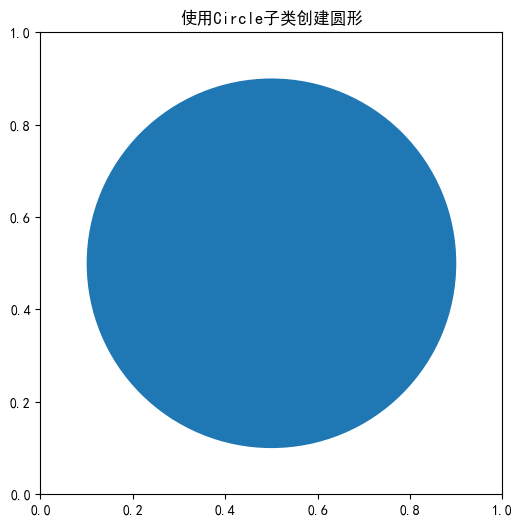

In [3]:
from matplotlib.patches import Circle

# 创建画布和坐标轴
fig, ax = plt.subplots(figsize=(6, 6))

# 创建一个圆形
circle = Circle(xy=(0.5, 0.5),  # 圆心
                radius=0.4,     # 半径
               )

# 将圆形添加到坐标轴
ax.add_patch(circle)

# 设置坐标轴范围
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')  # 保证x/y轴比例一致，圆形不变形

plt.title('使用Circle子类创建圆形')
plt.show()

# 2、常用方法：

当前面部颜色: (0.6784313725490196, 0.8470588235294118, 0.9019607843137255, 0.7)
当前边缘颜色: (0.0, 0.0, 0.5450980392156862, 0.7)
当前线宽: 3.0
点(0.5, 0.5)是否在圆内: True
点(0.1, 0.1)是否在圆内: False
点(0.8, 0.8)是否在圆内: False
点(0.9, 0.9)是否在圆内: False
圆形边界框: Bbox(x0=121.5, y0=112.19999999999999, x1=493.5, y1=481.8)


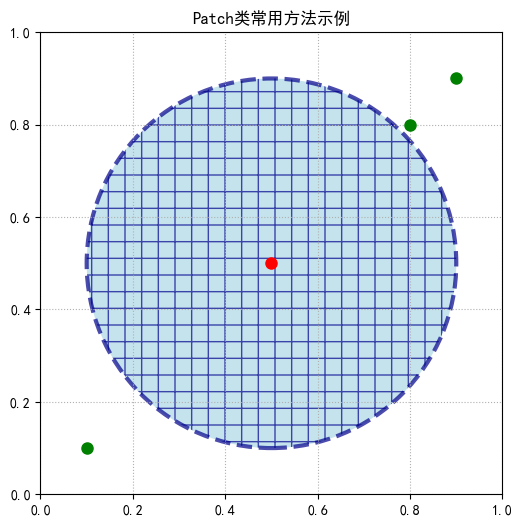

In [4]:
from matplotlib.patches import Circle

fig, ax = plt.subplots(figsize=(6, 6))

# 创建一个圆形
circle = Circle(
    xy=(0.5, 0.5),  # 圆心
    radius=0.4      # 半径
)

# 将圆形添加到坐标轴
ax.add_patch(circle)

# --------------------------
# 使用Patch类的常用方法
# --------------------------

# 1. 设置颜色属性
circle.set_facecolor('lightblue')  # 设置面部颜色
circle.set_edgecolor('darkblue')  # 设置边缘颜色
circle.set_alpha(0.7)            # 设置透明度

# 2. 设置线条属性
circle.set_linewidth(3)          # 设置线宽
circle.set_linestyle('--')       # 设置线条样式

# 3. 设置填充图案
circle.set_hatch('+')            # 设置内部填充

# 4. 获取并打印当前属性
print("当前面部颜色:", circle.get_facecolor())
print("当前边缘颜色:", circle.get_edgecolor())
print("当前线宽:", circle.get_linewidth())

# 5. 点包含判断示例
test_points = [(0.5, 0.5), (0.1, 0.1), (0.8, 0.8), (0.9, 0.9)]
# 获取数据坐标到显示坐标的转换
data_to_display = ax.transData.transform

for point in test_points:
    # 将数据坐标转换为显示坐标
    display_point = data_to_display(point)
    # 使用显示坐标进行包含性检测
    is_inside = circle.contains_point(display_point)
    print(f"点{point}是否在圆内: {is_inside}")
    # 在图上标记测试点
    color = 'red' if is_inside else 'green'
    ax.plot(point[0], point[1], 'o', color=color, markersize=8)

# 6. 获取圆形边界框
bbox = circle.get_extents()
print("圆形边界框:", bbox)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
plt.title('Patch类常用方法示例')
plt.grid(True, linestyle=':')
plt.show()

# 3、坐标系：

### 坐标系：

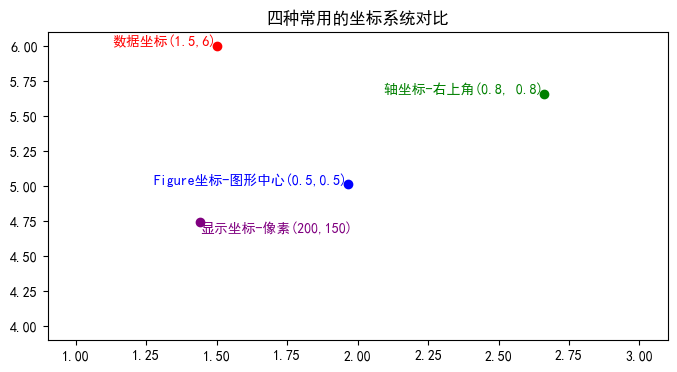

In [5]:
fig, ax = plt.subplots(figsize=(8, 4),dpi=100)  # 创建图形
ax.plot([1, 2, 3], [4, 5, 6],c='gray',alpha=0)  # 绘制示例数据

# 1. 数据坐标：在(1.5,6)处添加文本
ax.scatter(1.5, 6,color="red")
ax.text(1.5, 6, "数据坐标(1.5,6)", color="red",ha='right')

# 2. 轴坐标：在子图右上角(1,1)添加文本
ax.scatter(0.8, 0.8,color="green",transform=ax.transAxes)
ax.text(0.8, 0.8, "轴坐标-右上角(0.8, 0.8)", color="green", 
        transform=ax.transAxes,ha='right')

# 3. Figure坐标：在图形中心(0.5,0.5)添加文本
ax.scatter(0.5, 0.5,color="blue",transform=fig.transFigure)
fig.text(0.5, 0.5, "Figure坐标-图形中心(0.5,0.5)", color="blue", 
         transform=fig.transFigure,ha='right')

# 4. 显示坐标：在像素(200,150)处添加文本
ax.scatter(200, 150,color="purple",transform=None)
fig.text(200, 150, "显示坐标-像素(200,150)", color="purple",
         transform=None,  # 直接使用像素坐标
         va='top')
plt.title('四种常用的坐标系统对比')
plt.show()

### 坐标系转换

原始数据坐标: (5, 5)
数据坐标 → 显示坐标: [410. 297.]
显示坐标 → 数据坐标: [5. 5.]

原始轴坐标: (0.5, 0.5)
轴坐标 → 显示坐标: [410. 297.]
显示坐标 → 轴坐标: [0.5 0.5]

原始Figure坐标: (0.5, 0.5)
Figure坐标 → 显示坐标: [400. 300.]
显示坐标 → Figure坐标: [0.5 0.5]

数据坐标 → 轴坐标: [0.5 0.5]
轴坐标 → 数据坐标: [5. 5.]

数据坐标 → Figure坐标: [0.51 0.5 ]
Figure坐标 → 数据坐标: [4.84 5.06]


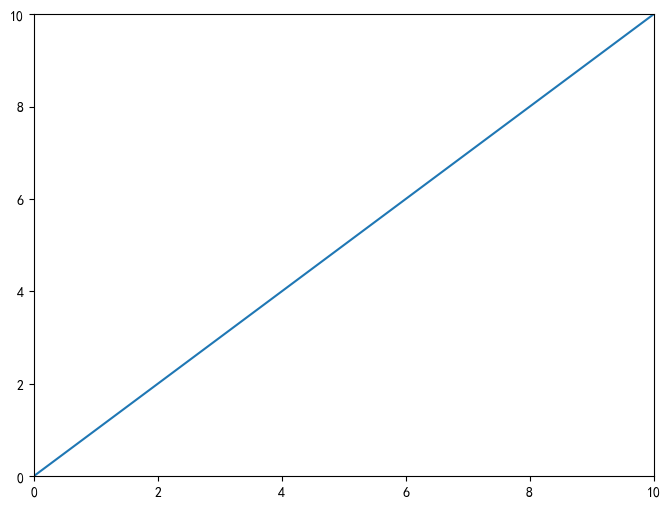

In [6]:
# 创建图形和子图
fig, ax = plt.subplots(figsize=(8, 6))  # 8x6英寸图形
ax.plot([0, 10], [0, 10])  # 绘制参考线
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# 定义一个参考点（数据坐标）
data_point = (5, 5)  # 数据坐标系中的点
print(f"原始数据坐标: {data_point}")


# 1. 数据坐标 ↔ 显示坐标
# 数据坐标 → 显示坐标（像素）
display_from_data = ax.transData.transform(data_point)
print(f"数据坐标 → 显示坐标: {display_from_data.round(2)}")

# 显示坐标 → 数据坐标
data_from_display = ax.transData.inverted().transform(display_from_data)
print(f"显示坐标 → 数据坐标: {data_from_display.round(2)}")


# 2. 轴坐标 ↔ 显示坐标
# 轴坐标中的参考点（子图中心）
axes_point = (0.5, 0.5)  # 轴坐标系范围是0~1
print(f"\n原始轴坐标: {axes_point}")

# 轴坐标 → 显示坐标
display_from_axes = ax.transAxes.transform(axes_point)
print(f"轴坐标 → 显示坐标: {display_from_axes.round(2)}")

# 显示坐标 → 轴坐标
axes_from_display = ax.transAxes.inverted().transform(display_from_axes)
print(f"显示坐标 → 轴坐标: {axes_from_display.round(2)}")


# 3. Figure坐标 ↔ 显示坐标
# Figure坐标中的参考点（图形中心）
figure_point = (0.5, 0.5)  # Figure坐标系范围是0~1
print(f"\n原始Figure坐标: {figure_point}")

# Figure坐标 → 显示坐标
display_from_figure = fig.transFigure.transform(figure_point)
print(f"Figure坐标 → 显示坐标: {display_from_figure.round(2)}")

# 显示坐标 → Figure坐标
figure_from_display = fig.transFigure.inverted().transform(display_from_figure)
print(f"显示坐标 → Figure坐标: {figure_from_display.round(2)}")


# 4. 跨坐标系转换（以数据坐标 ↔ 轴坐标为例）
# 数据坐标 → 轴坐标（通过显示坐标中转）
display = ax.transData.transform(data_point)
axes_from_data = ax.transAxes.inverted().transform(display)
print(f"\n数据坐标 → 轴坐标: {axes_from_data.round(2)}")

# 轴坐标 → 数据坐标（通过显示坐标中转）
display = ax.transAxes.transform(axes_point)
data_from_axes = ax.transData.inverted().transform(display)
print(f"轴坐标 → 数据坐标: {data_from_axes.round(2)}")


# 5. 跨坐标系转换（数据坐标 ↔ Figure坐标）
# 数据坐标 → Figure坐标
display = ax.transData.transform(data_point)
figure_from_data = fig.transFigure.inverted().transform(display)
print(f"\n数据坐标 → Figure坐标: {figure_from_data.round(2)}")

# Figure坐标 → 数据坐标
display = fig.transFigure.transform(figure_point)
data_from_figure = ax.transData.inverted().transform(display)
print(f"Figure坐标 → 数据坐标: {data_from_figure.round(2)}")

plt.show()